## Paper Summary of [_Searching and Mining Trillions of Time Series Subsequences under Dynamic Time Warping_](https://www.cs.ucr.edu/~eamonn/SIGKDD_trillion.pdf)


- Authors: Thanawin Rakthanmanon, Bilson Campana, Abdullah Mueen, Gustavo Batista, Brandon Westover, Qiang Zhu, Jesin Zakaria, Eamonn Keogh.
- Source: [Proceedings of the 18th ACM SIGKDD international conference on Knowledge discovery and data mining (2012)](https://dl.acm.org/citation.cfm?id=2339576)
- Topic: time series, dynamic time warping
- Summary: 2019/10/20 by Zhongxuan Mou

### Overall Summary


Contributed by researchers from UC Riverside and University of Sao Paulo, the UCR-DTW proposes 4 optimization techniques to speed up the sequential search algorithm Dynamic Time Warping (DTW) in calculating time series similarity. It covers multiple new early abandoning techniques to speed up the pruning, redefines the query to optimize to reduce the overhead, and combining multiple lower bounds calculation methods into one cascading manner.  The paper also tests the DTW against the classic Euclidean distance algorithm over multiple large-scale sequential datasets. 

### Main Contributions / Methodologies


#### Definitions 
- $Q$: query sequence.   
- $C$: candidate match of subsequence $T_{i,k}$ to $Q$, which starts from position i with length of k. 


#### Keys of the DTW Optimizations
- The method is based on the 4 assumptions of:    
1) using normalized time series subsequences as inputs;     
2) DTW is the best distance measure;     
3) arbitrary query lengths cannot be indexed especially for large datasets in trillions;     
4) the need for the calculating results is not time-sensitive. 


- Compared to the $i$-to-$i$ pairing on $Q$ and $C$ to get the Euclidean distance, DTW's alignments is nonlinear. 
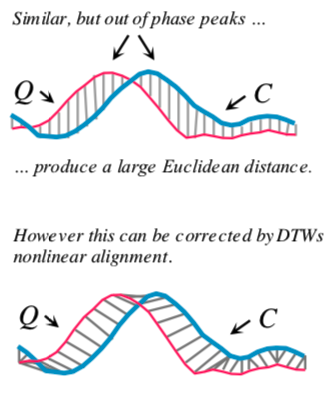
Instead, DTW constructs an n-by-n matrix with ($i^th$, $j^th$) element being the Euclidean distance between the $Q$ and $C$'s subsequences $d(q_i, c_j)$, and search for the optimal warping path using dynamic programming, with subject to multiple constraints:     
1) start and end points of the warping path must be the diagonally opposite corner cells of the matrix;     
2) points in the warping path must be monotonically spaced in time;     
3) steps in the warping path are restricted to adjacent cells;     
4) warping path is limited in deviations from the diagonal.     
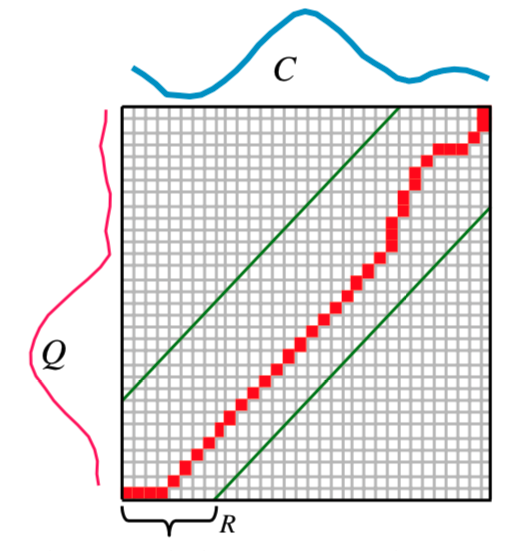


- 4 optimization search tricks are proposed to speed up the distance computations for either ED or DTW:     
1) **early abandoning Z-Normalization**  
By calculating euclidean distance and the Z-normalization in the same iteration, the early abandoning technique  makes the pruning happens earlier.         
2) **reordering early abandoning**     
The paper concludes that different orderings in computing the distance/normalization will produce different speedups. Compared to the traditional chronological ordering from left to right, it suggests that the optimal ordering to follow is the indices sorting based on the absolute values of the Z-normalized $Q$.     
3) **reversing the query/data role in $LB_{Keogh}EC$**       
Instead of building the envelope around the $Q$ to calculate the distance lower bound, the paper suggests to reverse the role s.t. the envelope is built around the $C$ instead. The new lower bound will then be the distance between $Q$ and the closer of {$U,L$} $LB_{Keogh}EC$. This trick helps remove the space overhead compared to using $LB_{Keogh}EQ$ as the goal.  
4) **cascading lower bounds**
To compare the performance of the common lower bounds' algorithms, the authors implemented all published ones and plotted their tightness of lower bound in the same figure. 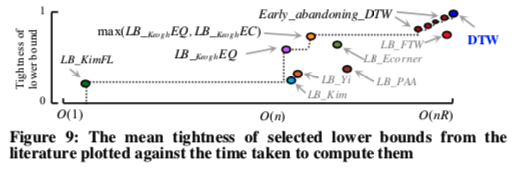 The 4th trick suggests that, instead of just choosing one of these to apply across all the phases, use all of them in a cascade manner -- meaning to use a different LB algorithm that is the optimized choice at its time complexity level. It claims more than 99.9999% of DTW calculation can be pruned using this technique in large-scale search. 


#### Experiment Results
To measure the UCR-DTW, the paper also implemented other 3 algorithms as comparisons in the following experiments: UCR-ED, SOTA-ED, SOTA-DTW. The baseline tests was ran on random walk data, and the results are compared with queries at different length, showing UCR DTW achieved the shortest searching time. 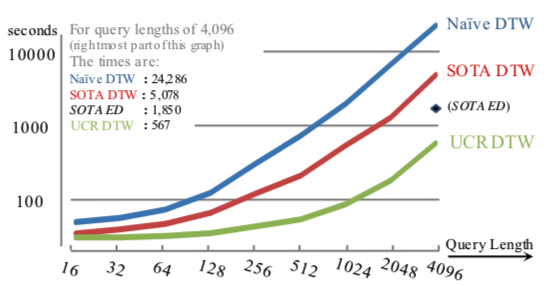 Experiments were also done with searching over long queries of epileptic spikes, and short queries of DNA clustering. Fast search for real-time medical and gesture data that is generated on lower-powered devices, with multiple channels, and with multiple simultaneous queries is also supported by UCR's version of DTW algorithm. Finally, the paper also demonstrates some speedup results with the existing time series mining algorithms. In terms of the time complexity analysis, it is pointed out that UCR-DTW lowers the average time complexity to less than O(n), compared to the traditional Euclidean distance and non-optimized DTW. 

### What I find as highlights


Large time series datasets proposes a pervasive challenge to the real scenarios in industry. One task that I encountered was to make predictions for large amounts of cloud analytics time series data. There are this ~100k virtual machines that will generate 1 memory/cpu utilization data per 5 seconds. The variant series length due to missing data aggravated the problem to be solved. 

To reduce the number of forecast models to train, my solution involved one step of time series clustering to group the series with similar patterns first. DTW once came as a choice during the literature search, yet it was given up due to the longer running time compared to the Euclidean distance. The optimization techniques presented in this paper, however, casts lights on the undiscovered potentials of DTW in handling large, real-time datasets. 

### Conclusions


The UCR-DTW suite introduces an optimized version of DTW to speed up the time series mining, which utilizes multiples pruning techniques in distance calculation and query definition. The paper also presents valid proofs through multiple diversified experiments. 

### Related Resources


[Lower-Bounding of Dynamic Time Warping Distances for
Multivariate Time Series](http://ciir.cs.umass.edu/pubfiles/mm-40.pdf)    
[Exact indexing of dynamic time warping](https://www.cs.ucr.edu/~eamonn/KAIS_2004_warping.pdf)    
[A decade of progress in indexing and mining large time series databases](https://dl.acm.org/citation.cfm?id=1164262)